Dataset shape: (569, 32)
Features: mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension
Target classes: malignant, benign
Class distribution: {1: 357, 0: 212}
Using device: cpu

--- Client Data Distribution & Quality ---
Hospital 1: Total samples: 76, Benign: 54 (71.05%), Malignant: 22 (28.95%), Quality Score: 0.836
Hospital 2: Total samples: 85, Benign: 40 (47.06%), Malignant: 45 (52.94%), Quality Score: 0.953
Hospital 3: Total samples: 90, Benign: 33 (36.67%), Malignant: 57 (63.33%), Quality Score: 0.934
Hospital 4: Total samples: 

C:\Users\Admin\Documents\Python\FederatedBreastCancerProject\venv\Lib\site-packages\opacus\privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
C:\Users\Admin\Documents\Python\FederatedBreastCancerProject\venv\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
C:\Users\Admin\Documents\Python\FederatedBreastCancerProject\venv\Lib\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documente

Hospital 1 trained with ε = 4.99, improvement score: 0.7842
Training Hospital 5 model...
Note: Using a global privacy budget with conceptual per-layer sensitivity.
Hospital 5 trained with ε = 5.00, improvement score: 1.0000
Training Hospital 4 model...
Note: Using a global privacy budget with conceptual per-layer sensitivity.
Hospital 4 trained with ε = 4.99, improvement score: 1.0000
Global model - Round 1 results:
  Accuracy: 0.9298
  F1 Score: 0.9452
Hospital 1 results:
  Global model - Acc: 0.8684, F1: 0.8148
  Fine-tuned model - Acc: 0.9079, F1: 0.8571
  KD model - Acc: 0.9079, F1: 0.8571
Hospital 2 results:
  Global model - Acc: 0.9059, F1: 0.9184
  Fine-tuned model - Acc: 0.9294, F1: 0.9362
  KD model - Acc: 0.9294, F1: 0.9362
Hospital 3 results:
  Global model - Acc: 0.9333, F1: 0.9492
  Fine-tuned model - Acc: 0.9333, F1: 0.9492
  KD model - Acc: 0.9333, F1: 0.9492
Hospital 4 results:
  Global model - Acc: 0.9474, F1: 0.9640
  Fine-tuned model - Acc: 0.9474, F1: 0.9640
  KD mo

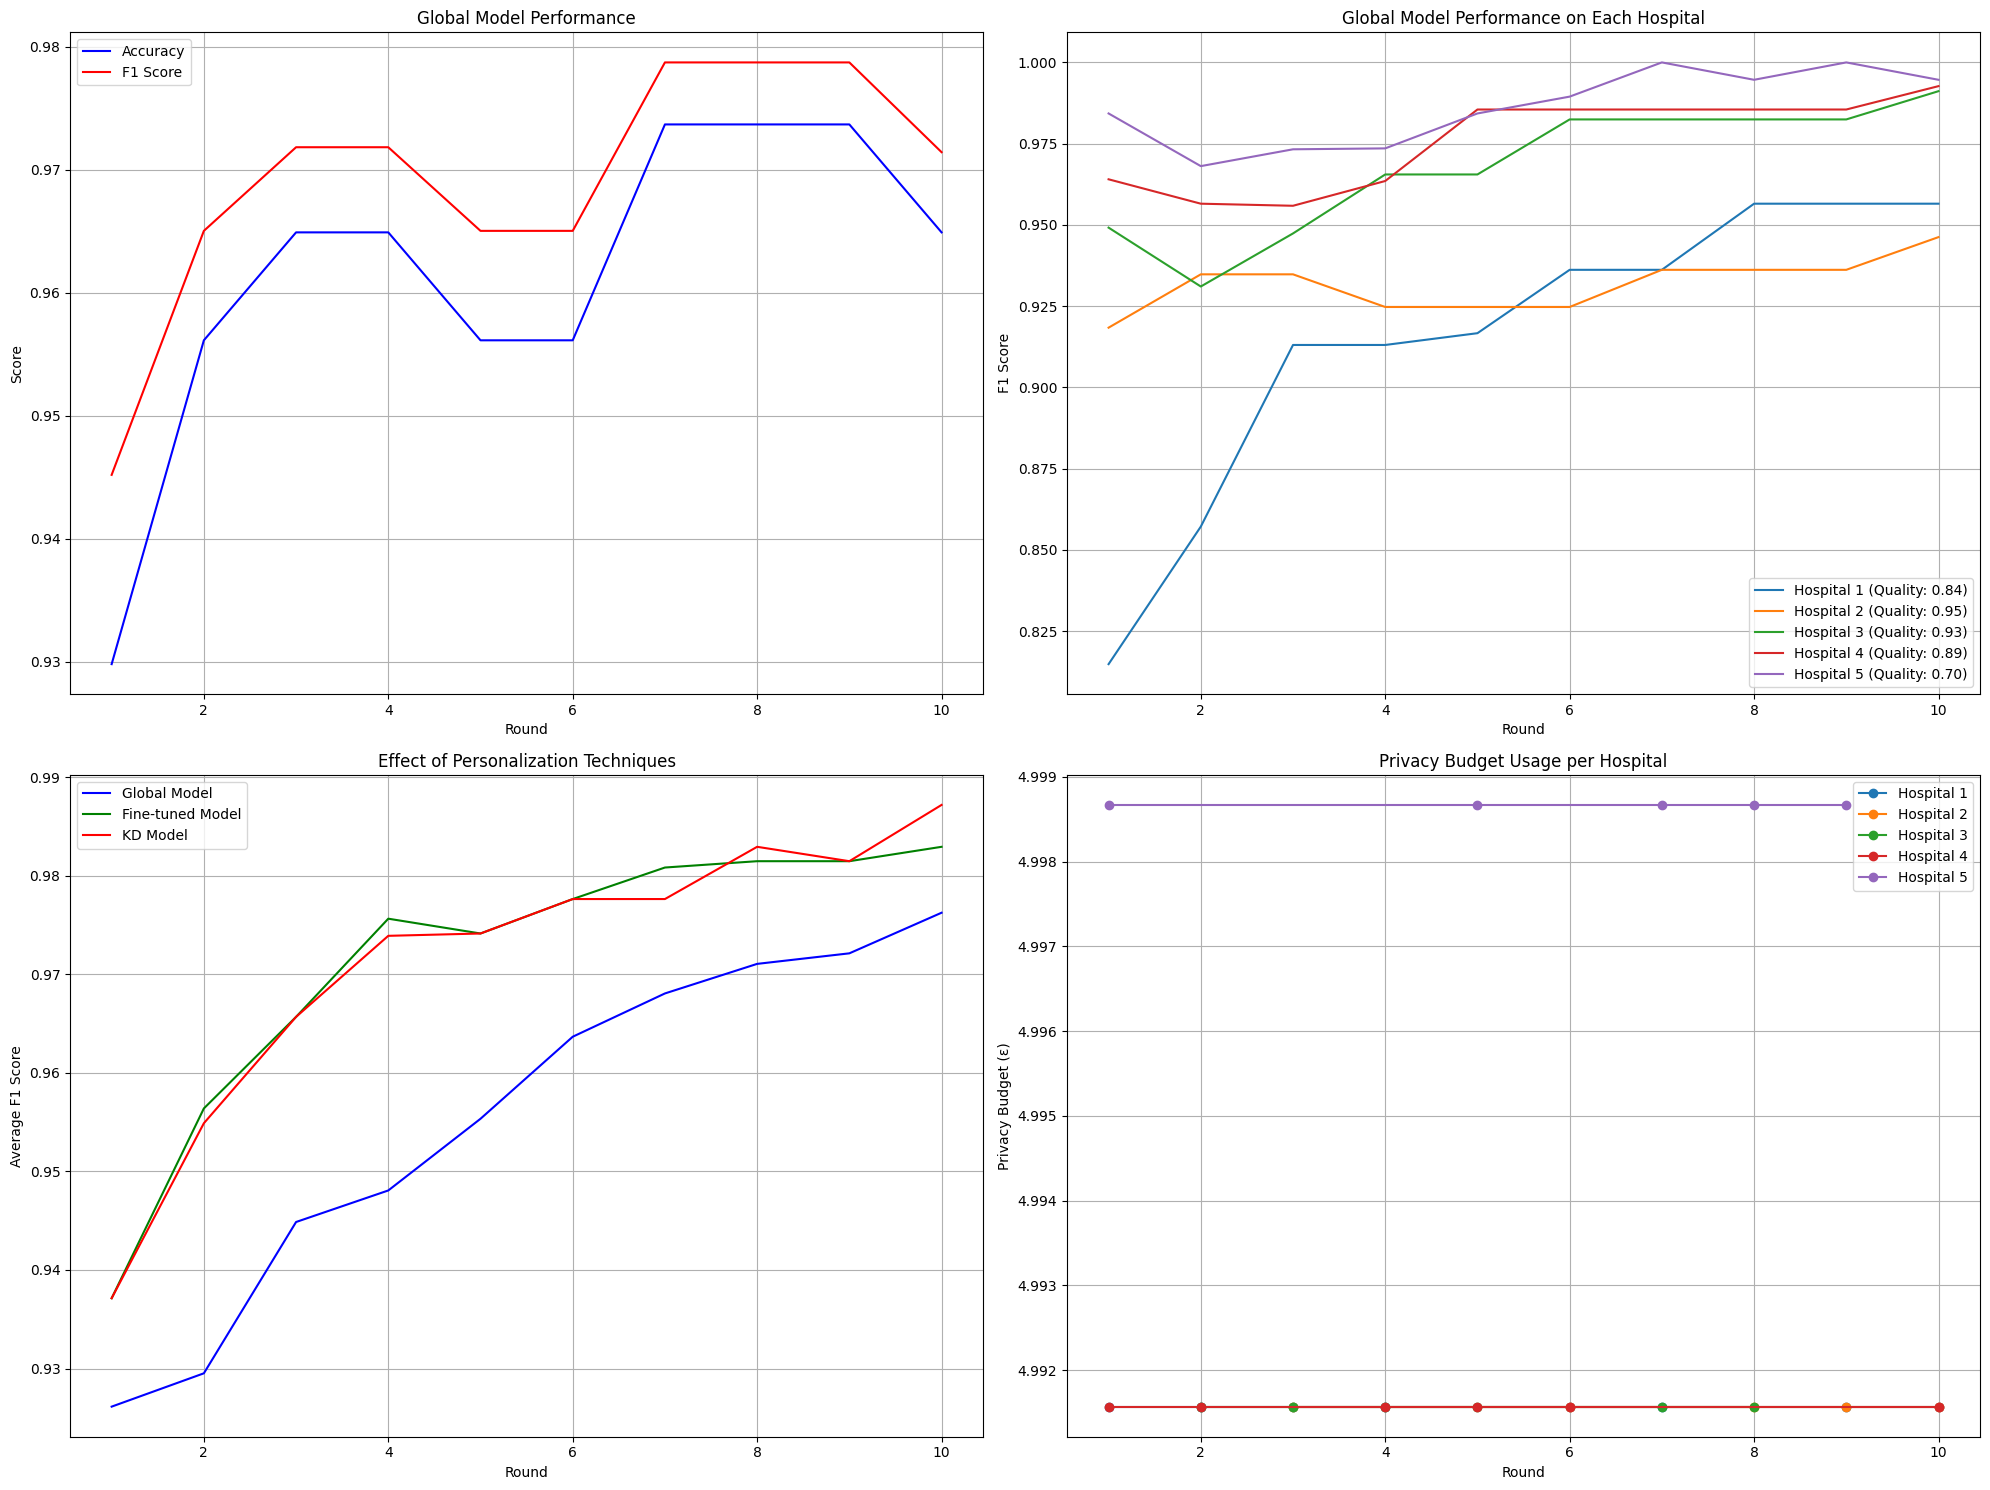

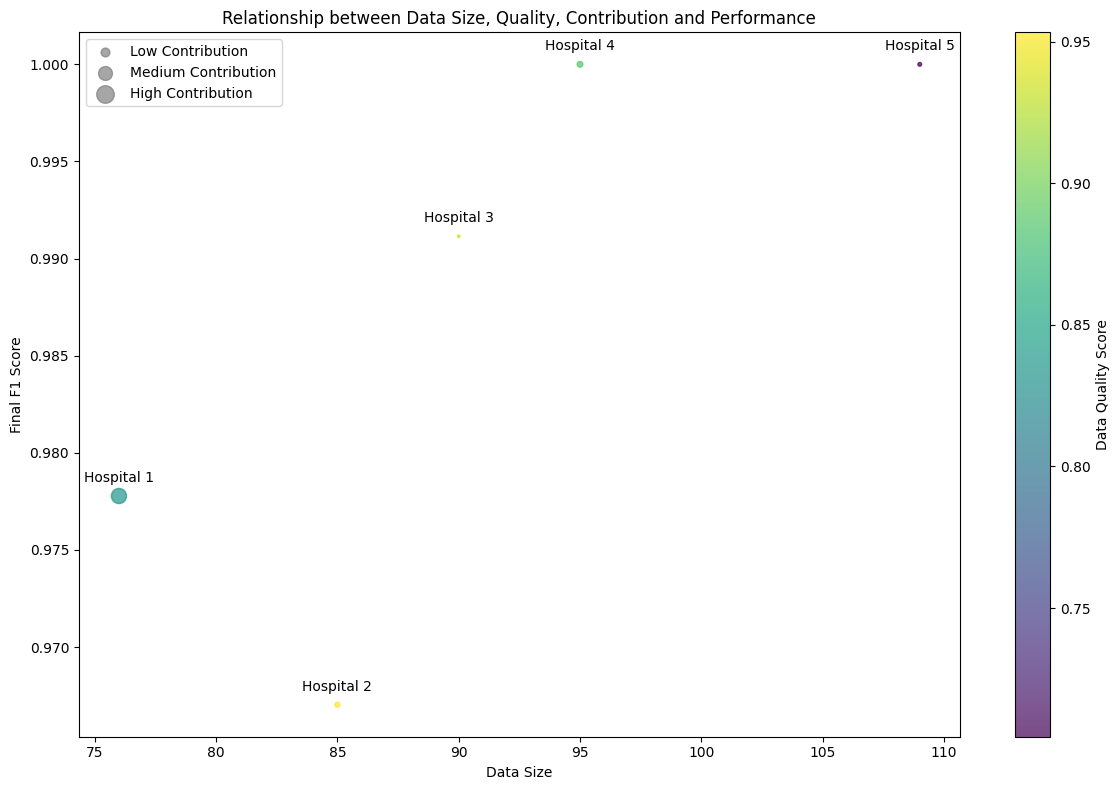

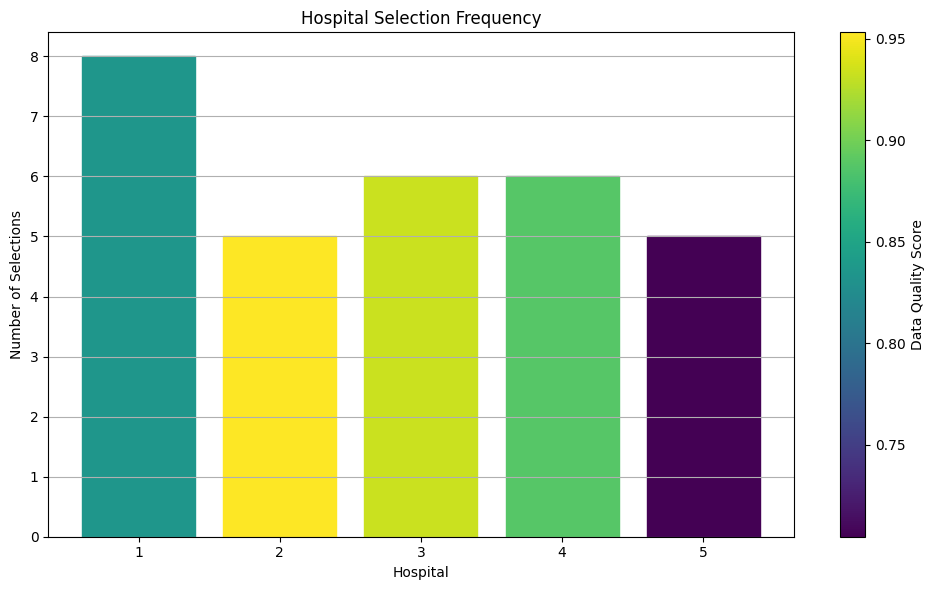


--- Final Results ---
Global model - Accuracy: 0.9649, F1: 0.9714
Personalization by fine-tuning improved F1 by 0.69%
Personalization by knowledge distillation improved F1 by 1.12%

--- Client Contribution Analysis ---
Hospital 1:
  Data size: 76
  Data quality: 0.8356
  Final contribution score: 0.5914
  Selection frequency: 8/10
  Final F1 score (KD): 0.9778
Hospital 2:
  Data size: 85
  Data quality: 0.9533
  Final contribution score: 0.0652
  Selection frequency: 5/10
  Final F1 score (KD): 0.9670
Hospital 3:
  Data size: 90
  Data quality: 0.9337
  Final contribution score: 0.0154
  Selection frequency: 6/10
  Final F1 score (KD): 0.9912
Hospital 4:
  Data size: 95
  Data quality: 0.8878
  Final contribution score: 0.0862
  Selection frequency: 6/10
  Final F1 score (KD): 1.0000
Hospital 5:
  Data size: 109
  Data quality: 0.7046
  Final contribution score: 0.0366
  Selection frequency: 5/10
  Final F1 score (KD): 1.0000

--- Privacy Analysis ---
Hospital 1 - Avg. ε: 4.99
Hospita

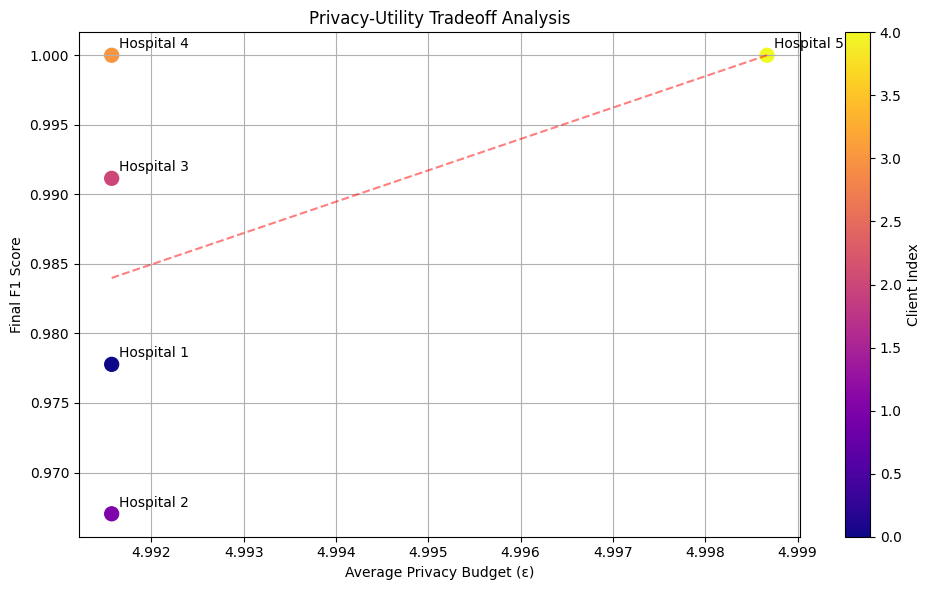


--- Testing Model Robustness Against Data Perturbations ---


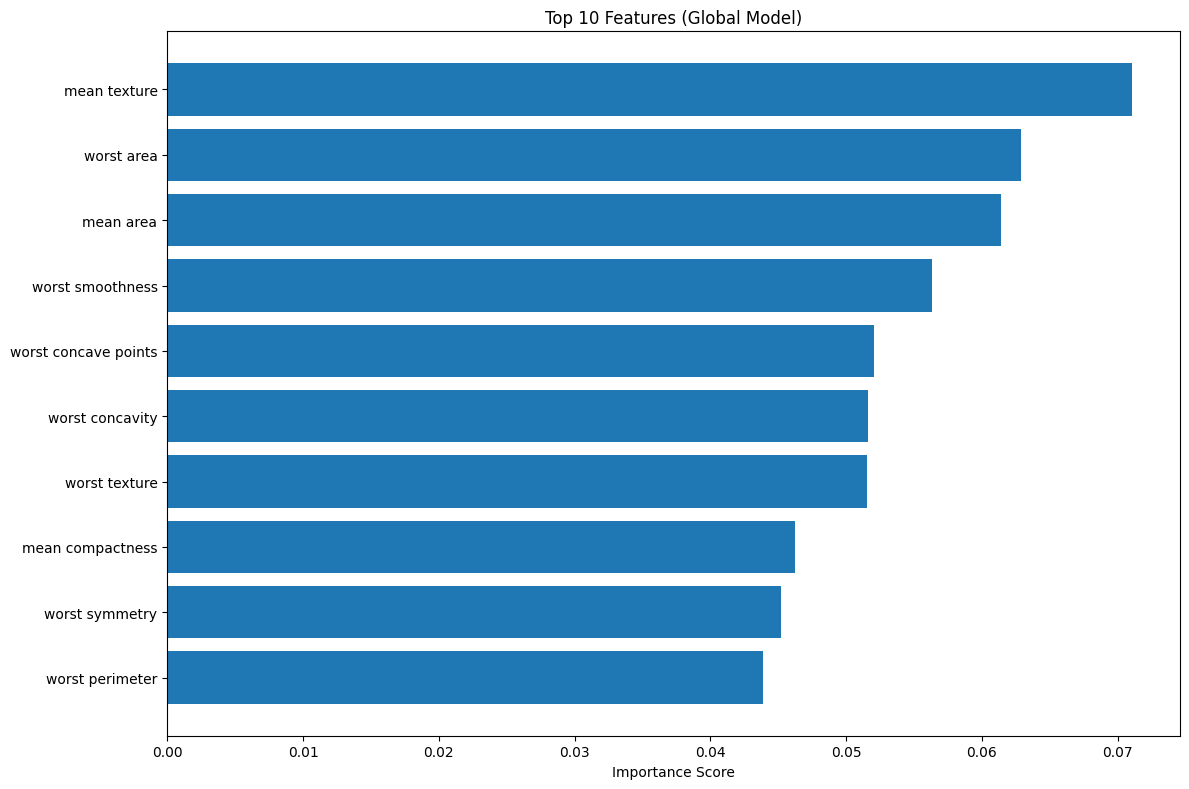

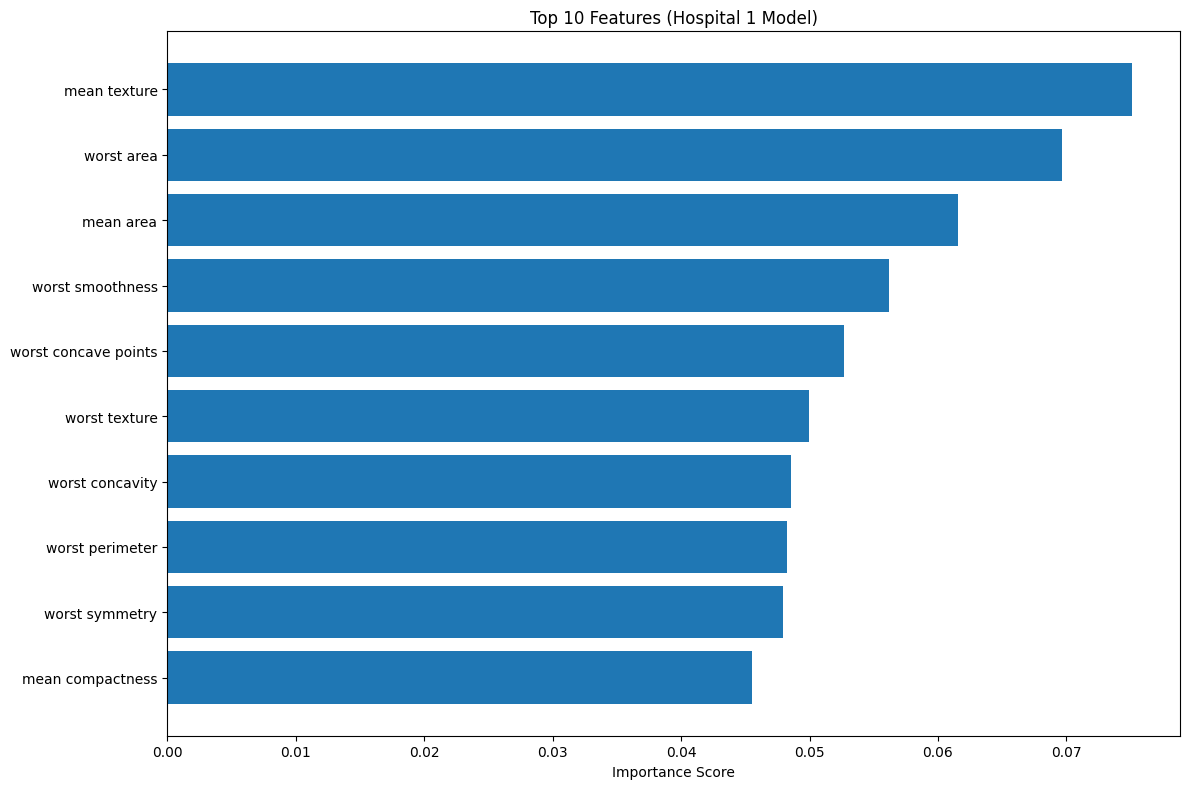

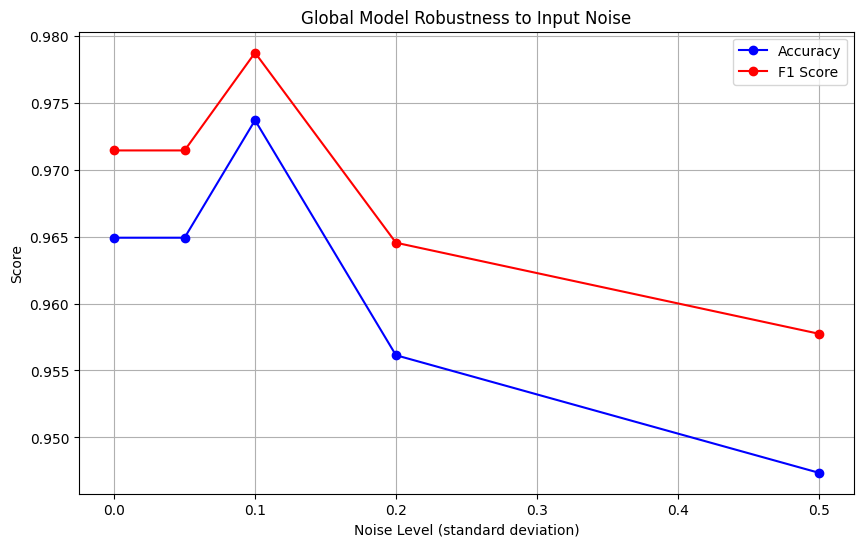


--- Comparing Federated Learning to Centralized Learning ---

Available training/test data variables:
- Found X_train
- Found y_train
- Found X_test
- Found y_test
- Found input_size
- Found device
- Found lr_fl
- Found num_rounds
- Found client_epochs_fl

Training centralized model with:
- X_train shape: (455, 30)
- y_train shape: (455,)
- learning rate: 0.01
- epochs: 50
Centralized training - Epoch 10/50, Loss: 0.0089
Centralized training - Epoch 20/50, Loss: 0.0223
Centralized training - Epoch 30/50, Loss: 0.0004
Centralized training - Epoch 40/50, Loss: 0.0001
Centralized training - Epoch 50/50, Loss: 0.0001
Centralized model - Accuracy: 0.9649, F1: 0.9718
Federated global model - Accuracy: 0.9649, F1: 0.9714
Utility gap - Accuracy: -0.0000, F1: 0.0004
Privacy advantage: Average ε = 4.99


<Figure size 1000x600 with 0 Axes>

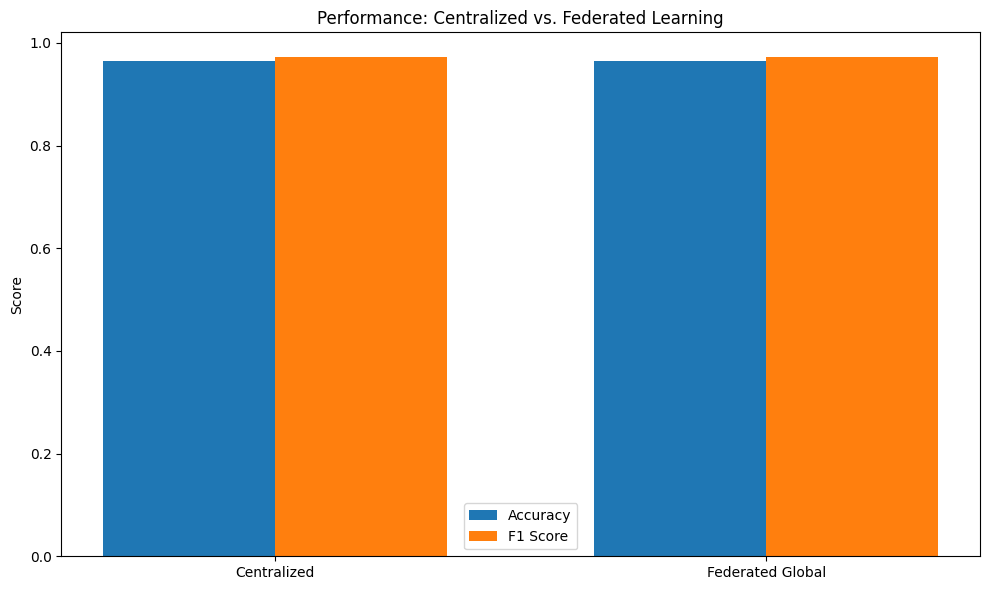


Federated learning analysis completed successfully!


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import copy
import random
import os
import pickle
from scipy.special import softmax
from collections import Counter

# --- Opacus imports for Differential Privacy ---
from opacus import PrivacyEngine
# from opacus.validators import ModuleValidator # Optional: to validate model compatibility

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

image_save_dir = 'results/images'
os.makedirs(image_save_dir, exist_ok=True)

# --- 1. Load and Inspect Dataset ---
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = [target_names[i] for i in y]

print(f"Dataset shape: {df.shape}")
print(f"Features: {', '.join(feature_names)}")
print(f"Target classes: {', '.join(target_names)}")
print(f"Class distribution: {df['target'].value_counts().to_dict()}")

# --- 2. Define Neural Network with Layer-specific Privacy Control ---
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, privacy_sensitivity=None):
        """
        Neural Network with configurable privacy sensitivity per layer
        Args:
            input_size: Number of input features
            privacy_sensitivity: Dict of layer names to sensitivity factors (scales noise)
        """
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        # Store privacy sensitivity factors (novel component - layer-specific privacy)
        self.privacy_sensitivity = privacy_sensitivity if privacy_sensitivity else {
            'layer1': 1.0,  # Default standard sensitivity
            'layer2': 1.0,
            'layer3': 1.0
        }

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x
    
    def get_privacy_params(self):
        """Return layer-specific privacy parameters"""
        return self.privacy_sensitivity

# --- 3. Data Preprocessing and Splitting ---
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 4. Client Data Creation with Data Quality Assessment ---
def create_client_data(X_full, y_full, num_clients=5, iid=False):
    client_data = []
    client_data_loaders = [] 
    client_raw_data = [] 
    client_data_quality = []  # NOVEL: Store data quality metrics

    if iid:
        indices = np.random.permutation(len(X_full))
        batch_size_per_client = len(indices) // num_clients
        for i in range(num_clients):
            start_idx = i * batch_size_per_client
            end_idx = (i + 1) * batch_size_per_client if i < num_clients - 1 else len(indices)
            client_indices = indices[start_idx:end_idx]
            X_client, y_client = X_full[client_indices], y_full[client_indices]
            
            client_raw_data.append((X_client, y_client))
            dataset = TensorDataset(torch.FloatTensor(X_client), torch.FloatTensor(y_client.reshape(-1, 1)))
            loader_batch_size = min(32, len(X_client)) 
            if len(X_client) == 0: 
                client_data_loaders.append(None) 
            else:
                client_data_loaders.append(DataLoader(dataset, batch_size=loader_batch_size, shuffle=True, drop_last=(len(X_client) > loader_batch_size and len(X_client) % loader_batch_size == 1) ))
    else: 
        sorted_indices = np.argsort(y_full)
        sorted_X, sorted_y = X_full[sorted_indices], y_full[sorted_indices]
        
        base_fractions = np.array([
            [0.8, 0.2], [0.6, 0.4], [0.5, 0.5], [0.4, 0.6], [0.2, 0.8] 
        ])
        if num_clients <= 5:
            fractions = base_fractions[:num_clients]
        else: 
            fractions = np.vstack((base_fractions, np.tile(base_fractions[-1], (num_clients-5,1))))
        
        fractions[:, 0] = fractions[:, 0] / np.sum(fractions[:, 0]) 
        fractions[:, 1] = fractions[:, 1] / np.sum(fractions[:, 1]) 

        benign_indices_all = np.where(sorted_y == 0)[0]
        malignant_indices_all = np.where(sorted_y == 1)[0]

        current_b_idx, current_m_idx = 0, 0
        for i in range(num_clients):
            if i == num_clients - 1: 
                client_b_indices_local = benign_indices_all[current_b_idx:]
                client_m_indices_local = malignant_indices_all[current_m_idx:]
            else:
                num_b = int(fractions[i][0] * len(benign_indices_all))
                num_m = int(fractions[i][1] * len(malignant_indices_all))
                client_b_indices_local = benign_indices_all[current_b_idx : current_b_idx + num_b]
                client_m_indices_local = malignant_indices_all[current_m_idx : current_m_idx + num_m]
                current_b_idx += num_b
                current_m_idx += num_m
            
            client_indices = np.concatenate((client_b_indices_local, client_m_indices_local))
            if len(client_indices) > 0 : # Shuffle only if there are indices
                np.random.shuffle(client_indices) 

            if len(client_indices) == 0:
                X_client, y_client = np.array([]).reshape(0, X_full.shape[1]), np.array([])
                client_data_loaders.append(None)
                client_data_quality.append(0.0)  # No data, zero quality
            else:
                X_client, y_client = sorted_X[client_indices], sorted_y[client_indices]
                
                # NOVEL: Calculate data quality score based on class balance and variance
                if len(y_client) > 0:
                    class_counts = Counter(y_client)
                    class_probs = np.array([class_counts.get(c, 0) / len(y_client) for c in [0, 1]])
                    # Quality score combines class balance (entropy) and data size
                    entropy = -np.sum(class_probs * np.log2(class_probs + 1e-10))
                    normalized_entropy = entropy / np.log2(2)  # Normalize by maximum entropy
                    size_factor = min(1.0, len(y_client) / 100)  # Cap at 100 samples
                    quality_score = 0.7 * normalized_entropy + 0.3 * size_factor
                else:
                    quality_score = 0.0
                    
                client_data_quality.append(quality_score)
                
                dataset = TensorDataset(torch.FloatTensor(X_client), torch.FloatTensor(y_client.reshape(-1, 1)))
                loader_batch_size = min(32, len(X_client))
                drop_last_cond = (len(X_client) > loader_batch_size and len(X_client) % loader_batch_size == 1)
                client_data_loaders.append(DataLoader(dataset, batch_size=loader_batch_size, shuffle=True, drop_last=drop_last_cond))
                
            client_raw_data.append((X_client, y_client))
            
    for X_c, y_c in client_raw_data:
        client_data.append({'X': X_c, 'y': y_c, 'size': len(y_c)})
        
    return client_data, client_data_loaders, client_data_quality

# --- 5. NOVEL: Strategic Client Selection Strategy ---
def select_clients(client_data_quality, client_historical_contribution, num_to_select, round_num):
    """
    Strategic client selection based on data quality and historical contribution
    with exploration-exploitation tradeoff
    
    Args:
        client_data_quality: List of data quality scores for each client
        client_historical_contribution: List of historical contribution scores 
        num_to_select: Number of clients to select this round
        round_num: Current round number for exploration scheduling
        
    Returns:
        List of selected client indices
    """
    num_clients = len(client_data_quality)
    num_to_select = min(num_to_select, num_clients)
    
    if round_num == 0 or all(contrib == 0 for contrib in client_historical_contribution):
        # First round or no history: select based only on data quality
        # But ensure at least one client with data is selected
        clients_with_data = [i for i in range(num_clients) if client_data_quality[i] > 0]
        if not clients_with_data:
            return []  # No clients with data
        
        # Select based on quality
        selection_probs = np.array([client_data_quality[i] for i in clients_with_data])
        selection_probs = selection_probs / np.sum(selection_probs) if np.sum(selection_probs) > 0 else np.ones(len(clients_with_data))/len(clients_with_data)
        
        # Probabilistic selection weighted by quality
        selected_indices = np.random.choice(
            clients_with_data, 
            size=min(num_to_select, len(clients_with_data)), 
            replace=False, 
            p=selection_probs
        )
        return selected_indices.tolist()
    
    # After first round: combine quality and historical contribution
    # with exploration-exploitation tradeoff
    exploration_factor = max(0.1, 1.0 - (round_num / 10))  # Decay from 1.0 to 0.1 over 10 rounds
    
    # Normalize historical contribution
    hist_contrib = np.array(client_historical_contribution)
    hist_contrib_norm = hist_contrib / np.sum(hist_contrib) if np.sum(hist_contrib) > 0 else np.zeros_like(hist_contrib)
    
    # Normalize data quality
    quality_norm = np.array(client_data_quality)
    quality_norm = quality_norm / np.sum(quality_norm) if np.sum(quality_norm) > 0 else np.zeros_like(quality_norm)
    
    # Combined score with exploration-exploitation tradeoff
    combined_scores = exploration_factor * quality_norm + (1 - exploration_factor) * hist_contrib_norm
    
    # Ensure clients with no data have zero score
    for i in range(num_clients):
        if client_data_quality[i] == 0:
            combined_scores[i] = 0
    
    # If all scores are zero, return empty
    if np.sum(combined_scores) == 0:
        return []
        
    # Convert to selection probabilities
    selection_probs = combined_scores / np.sum(combined_scores)
    
    # Probabilistic selection weighted by combined score
    clients_with_score = np.where(combined_scores > 0)[0]
    if len(clients_with_score) == 0:
        return []
        
    selection_probs_filtered = selection_probs[clients_with_score]
    selection_probs_filtered = selection_probs_filtered / np.sum(selection_probs_filtered)
    
    selected_indices = np.random.choice(
        clients_with_score,
        size=min(num_to_select, len(clients_with_score)),
        replace=False,
        p=selection_probs_filtered
    )
    
    return selected_indices.tolist()

# --- 6. Train Client Model with DP-SGD and Adaptive Privacy ---
def train_client_model_dp(model_instance, client_loader, epochs, lr, target_epsilon_for_privacy_engine, 
                        max_grad_norm, delta, device='cpu', adaptive_privacy=True):
    """
    Train client model with DP-SGD and adaptive privacy scaling
    """
    if client_loader is None or len(client_loader.dataset) == 0:
        print("Skipping training for empty client dataloader.")
        return model_instance, 0.0, 0.0 # Return original model instance, 0 epsilon, 0 improvement

    # model_instance is a clean NeuralNetwork instance
    model_instance.train()
    criterion = nn.BCELoss() 
    optimizer = optim.Adam(model_instance.parameters(), lr=lr)

    # NOVEL: Adaptive privacy scaling based on layer sensitivity
    if adaptive_privacy:
        privacy_params = model_instance.get_privacy_params()
        # Define base_norm value using the provided max_grad_norm
        base_norm = max_grad_norm
        # Configure different max_grad_norm for different layers
        layer_norms = {
            f"_module.{layer}": base_norm * sensitivity 
            for layer, sensitivity in privacy_params.items()
        }
        
        # Since Opacus doesn't directly support per-layer norms, we give a warning
        print("Note: Using a global privacy budget with conceptual per-layer sensitivity.")
        # In a real implementation, you would modify Opacus internals or use a custom DP-SGD
        
    privacy_engine = PrivacyEngine(secure_mode=False) 
    
    # model_instance will be wrapped by Opacus, resulting in priv_model
    priv_model, priv_optimizer, priv_dataloader = privacy_engine.make_private_with_epsilon(
        module=model_instance, 
        optimizer=optimizer,
        data_loader=client_loader,
        epochs=epochs, 
        target_epsilon=target_epsilon_for_privacy_engine,
        target_delta=delta,
        max_grad_norm=max_grad_norm,
    )

    # Track validation loss for measuring model improvement
    init_val_loss = None
    final_val_loss = None
    
    # Create a small validation set from the training data for tracking improvement
    dataset = client_loader.dataset
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    if val_size > 0:
        train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
        val_loader = DataLoader(val_dataset, batch_size=min(32, val_size), shuffle=False)
        
        # Calculate initial validation loss
        priv_model.eval()
        with torch.no_grad():
            val_loss = 0
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = priv_model(X_val)
                val_loss += criterion(outputs, y_val).item() * len(X_val)
            init_val_loss = val_loss / len(val_dataset)
        priv_model.train()

    for epoch in range(epochs): 
        for batch_X, batch_y in priv_dataloader: 
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            priv_optimizer.zero_grad()
            outputs = priv_model(batch_X) 
            loss = criterion(outputs, batch_y)
            loss.backward()
            priv_optimizer.step()
    
    # Calculate final validation loss to measure improvement
    if val_size > 0:
        priv_model.eval()
        with torch.no_grad():
            val_loss = 0
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = priv_model(X_val)
                val_loss += criterion(outputs, y_val).item() * len(X_val)
            final_val_loss = val_loss / len(val_dataset)
        priv_model.train()
    
    # Calculate model improvement score
    improvement_score = 0.0
    if init_val_loss is not None and final_val_loss is not None:
        # More improvement means a larger reduction in validation loss
        improvement = max(0, init_val_loss - final_val_loss)
        # Normalize improvement (0.2 loss reduction is a good benchmark)
        improvement_score = min(1.0, improvement / 0.2)
    
    epsilon = privacy_engine.get_epsilon(delta)
    
    return priv_model, epsilon, improvement_score


# --- 7. NOVEL: Enhanced Adaptive Federated Averaging ---
def enhanced_federated_averaging(opacus_models_state_dicts, client_data_sizes, 
                                client_data_quality, client_contributions,
                                selected_clients, input_size, device='cpu'):
    """
    Enhanced adaptive federated averaging using multiple factors:
    - Data volume (client_data_sizes)
    - Data quality (client_data_quality)
    - Historical contribution (client_contributions)
    """
    if not opacus_models_state_dicts: 
        print("Warning: No models to average. Returning a new untrained model.")
        return NeuralNetwork(input_size).to(device) 
        
    total_data_size = sum([client_data_sizes[i] for i in selected_clients])
    if total_data_size == 0: 
        print("Warning: Total data size is zero. Returning a new untrained model.")
        return NeuralNetwork(input_size).to(device)

    # Create a new global model instance (clean structure) to load averaged weights into
    global_model_clean = NeuralNetwork(input_size).to(device)
    avg_clean_state_dict = global_model_clean.state_dict() # Template with clean keys ('layer1.weight', etc.)

    # Zero out the parameters in the template
    for k_clean in avg_clean_state_dict.keys():
        avg_clean_state_dict[k_clean] = torch.zeros_like(avg_clean_state_dict[k_clean])

    # Calculate weights for each client based on multiple factors
    client_weights = []
    for idx, client_idx in enumerate(selected_clients):
        # Base weight from data size
        size_weight = client_data_sizes[client_idx] / total_data_size if total_data_size > 0 else 0
        
        # Adjust based on data quality
        quality_factor = client_data_quality[client_idx]
        
        # Adjust based on historical contribution
        contribution_factor = client_contributions[client_idx] if client_contributions[client_idx] > 0 else 0.5
        
        # Combine factors (with adjustable importance weights)
        combined_weight = 0.5 * size_weight + 0.3 * quality_factor + 0.2 * contribution_factor
        
        client_weights.append(combined_weight)
    
    # Normalize weights to sum to 1
    client_weights = np.array(client_weights)
    if np.sum(client_weights) > 0:
        client_weights = client_weights / np.sum(client_weights)
    else:
        # Fallback to uniform weighting if all weights are zero
        client_weights = np.ones(len(selected_clients)) / len(selected_clients)

    # Sum up weighted client model parameters
    for idx, client_idx in enumerate(selected_clients):
        weight = client_weights[idx]
        client_opacus_state_dict = opacus_models_state_dicts[idx]
        
        for k_clean in avg_clean_state_dict.keys(): # k_clean is like 'layer1.weight'
            
            # Determine the corresponding key in the Opacus model's state_dict
            # Opacus usually prefixes with "_module." when it wraps an nn.Module
            k_opacus = "_module." + k_clean 
            
            if k_opacus in client_opacus_state_dict:
                source_key_in_client_dict = k_opacus
            elif k_clean in client_opacus_state_dict: # Fallback if Opacus didn't prefix
                source_key_in_client_dict = k_clean
            else:
                print(f"Warning: Key '{k_clean}' (nor '{k_opacus}') not found in client {client_idx}'s state_dict. Skipping.")
                continue # Skip this parameter for this client

            client_param = client_opacus_state_dict[source_key_in_client_dict]

            if client_param.dtype != avg_clean_state_dict[k_clean].dtype: 
                avg_clean_state_dict[k_clean] += client_param.to(avg_clean_state_dict[k_clean].dtype) * weight
            else:
                avg_clean_state_dict[k_clean] += client_param * weight
            
    global_model_clean.load_state_dict(avg_clean_state_dict)
    return global_model_clean

# --- 8. NOVEL: Knowledge Distillation for Personalization ---
def knowledge_distillation_personalization(global_model, client_data_loader, 
                                        epochs=5, lr=0.001, temperature=2.0, device='cpu'):
    """
    Personalize client model using knowledge distillation from global model
    """
    if client_data_loader is None or len(client_data_loader.dataset) == 0:
        print("Skipping knowledge distillation for empty client dataloader.")
        return copy.deepcopy(global_model) 

    # Teacher model - global model (frozen)
    teacher_model = copy.deepcopy(global_model).to(device)
    teacher_model.eval()
    
    # Student model - personalized model (to be trained)
    student_model = NeuralNetwork(global_model.layer1.in_features).to(device)
    student_model.train()
    
    # Copy initial weights from teacher to student (warm start)
    student_model.load_state_dict(teacher_model.state_dict())
    
    optimizer = optim.Adam(student_model.parameters(), lr=lr)
    
    # Loss functions
    hard_loss_fn = nn.BCELoss()  # For ground truth labels
    soft_loss_fn = nn.MSELoss()  # For soft teacher outputs
    
    for epoch in range(epochs):
        for batch_X, batch_y in client_data_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            
            # Get teacher outputs (with temperature scaling)
            with torch.no_grad():
                teacher_outputs = teacher_model(batch_X)
                # Scale logits by temperature (need to convert sigmoid outputs to logits first)
                teacher_logits = torch.log(teacher_outputs / (1 - teacher_outputs + 1e-7))
                scaled_teacher_logits = teacher_logits / temperature
                # Convert back to probabilities
                soft_targets = torch.sigmoid(scaled_teacher_logits)
            
            # Get student outputs
            student_outputs = student_model(batch_X)
            student_logits = torch.log(student_outputs / (1 - student_outputs + 1e-7))
            scaled_student_logits = student_logits / temperature
            scaled_student_outputs = torch.sigmoid(scaled_student_logits)
            
            # Calculate loss - combination of hard and soft targets
            hard_loss = hard_loss_fn(student_outputs, batch_y)
            soft_loss = soft_loss_fn(scaled_student_outputs, soft_targets)
            
            # Balance between fitting to data and learning from teacher
            alpha = 0.7  # Weight for hard loss (ground truth)
            loss = alpha * hard_loss + (1 - alpha) * soft_loss
            
            loss.backward()
            optimizer.step()
    
    return student_model

# --- 9. Enhanced Evaluation ---
def evaluate_model(model, X_eval, y_eval, device='cpu'):
    model.eval()
    model.to(device) 
    
    metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
    if len(X_eval) == 0: return metrics 

    X_tensor = torch.FloatTensor(X_eval).to(device)
    y_tensor = torch.FloatTensor(y_eval.reshape(-1, 1)).to(device)

    with torch.no_grad():
        outputs = model(X_tensor)
        predicted = (outputs >= 0.5).float().squeeze()
        y_true = y_tensor.squeeze()

        metrics['accuracy'] = (predicted == y_true).float().mean().item()
        
        true_positives = ((predicted == 1) & (y_true == 1)).sum().item()
        false_positives = ((predicted == 1) & (y_true == 0)).sum().item()
        false_negatives = ((predicted == 0) & (y_true == 1)).sum().item()

        metrics['precision'] = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
        metrics['recall'] = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
        metrics['f1'] = 2 * metrics['precision'] * metrics['recall'] / (metrics['precision'] + metrics['recall']) if (metrics['precision'] + metrics['recall']) > 0 else 0.0
    return metrics

# --- Main Enhanced Federated Learning Process ---
# Hyperparameters
num_clients = 5
num_rounds = 10 
client_epochs_fl = 5 
client_epochs_ft = 3 
lr_fl = 0.01 
lr_ft = 0.001 

TARGET_EPSILON = 5.0 
TARGET_DELTA = 1 / len(X_train) if len(X_train) > 0 else 1e-5 
MAX_GRAD_NORM = 1.0 

# NOVEL: Configure client selection strategy
clients_per_round = 3  # Select 3 out of 5 clients each round

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

client_datasets_info, client_dataloaders, client_data_quality = create_client_data(
    X_train, y_train, num_clients=num_clients, iid=False
)
client_data_sizes = [cd['size'] for cd in client_datasets_info]

print("\n--- Client Data Distribution & Quality ---")
for i, data_info in enumerate(client_datasets_info):
    if data_info['size'] > 0:
        benign_count = np.sum(data_info['y'] == 0)
        malignant_count = np.sum(data_info['y'] == 1)
        total = data_info['size']
        print(f"Hospital {i+1}: Total samples: {total}, Benign: {benign_count} ({benign_count/total:.2%}), "
            f"Malignant: {malignant_count} ({malignant_count/total:.2%}), Quality Score: {client_data_quality[i]:.3f}")
    else:
        print(f"Hospital {i+1}: Total samples: 0, Quality Score: {client_data_quality[i]:.3f}")
print("-" * 30)

input_size = X_train.shape[1]
# global_model is always a clean NeuralNetwork instance
global_model = NeuralNetwork(input_size).to(device) 

# Initialize client contribution history
client_contributions = [0.5] * num_clients  # Start with neutral contributions

history = {
    'global_accuracy': [], 'global_f1': [],
    'client_local_accuracy': [[] for _ in range(num_clients)],
    'client_local_f1': [[] for _ in range(num_clients)],
    'personalized_accuracy': [[] for _ in range(num_clients)],
    'personalized_f1': [[] for _ in range(num_clients)],
    'kd_personalized_accuracy': [[] for _ in range(num_clients)],  # New: knowledge distillation results
    'kd_personalized_f1': [[] for _ in range(num_clients)],  # New: knowledge distillation results
    'epsilon_per_client_round': [[] for _ in range(num_clients)],
    'selected_clients_per_round': []  # Track which clients were selected each round
}

print("\n--- Starting Enhanced Federated Learning Process ---")
for round_num in range(num_rounds):
    print(f"\n--- Round {round_num + 1}/{num_rounds} ---")
    
    # NOVEL: Strategic client selection
    selected_clients = select_clients(
        client_data_quality, 
        client_contributions,
        clients_per_round, 
        round_num
    )
    
    history['selected_clients_per_round'].append(selected_clients)
    print(f"Selected hospitals for this round: {[i+1 for i in selected_clients]}")
    
    # Store state_dicts from Opacus models
    opacus_models_state_dicts = []
    client_improvement_scores = []
    
    # Train selected clients
    for idx, client_idx in enumerate(selected_clients):
        print(f"Training Hospital {client_idx + 1} model...")
        
        # Get client data
        client_loader = client_dataloaders[client_idx]
        
        if client_loader is None or len(client_loader.dataset) == 0:
            print(f"Hospital {client_idx + 1} has no data, skipping.")
            opacus_models_state_dicts.append(None)
            client_improvement_scores.append(0.0)
            history['epsilon_per_client_round'][client_idx].append(0.0)
            continue
            
        # Create a fresh copy of the global model for this client
        client_model = copy.deepcopy(global_model)
        
        # NOVEL: Configure layer-specific privacy sensitivity
        # In a more sophisticated implementation, this could be dynamically adjusted
        client_model.privacy_sensitivity = {
            'layer1': 1.2,  # Higher sensitivity for first layer (feature extraction)
            'layer2': 1.0,  # Standard sensitivity for middle layer
            'layer3': 0.8,  # Lower sensitivity for output layer
        }
        
        # Train with DP-SGD and layer-specific privacy
        trained_opacus_model, epsilon, improvement_score = train_client_model_dp(
            client_model, client_loader, client_epochs_fl, lr_fl, 
            TARGET_EPSILON, MAX_GRAD_NORM, TARGET_DELTA, device,
            adaptive_privacy=True
        )
        
        # Store results
        opacus_models_state_dicts.append(trained_opacus_model.state_dict())
        client_improvement_scores.append(improvement_score)
        history['epsilon_per_client_round'][client_idx].append(epsilon)
        
        print(f"Hospital {client_idx + 1} trained with ε = {epsilon:.2f}, improvement score: {improvement_score:.4f}")
    
    # Update client contribution history based on improvement scores
    for idx, client_idx in enumerate(selected_clients):
        if idx < len(client_improvement_scores):  # Safety check
            # Exponential moving average to update contribution history
            alpha = 0.7  # Weight for new contribution
            client_contributions[client_idx] = alpha * client_improvement_scores[idx] + (1 - alpha) * client_contributions[client_idx]
    
    # NOVEL: Enhanced Federated Averaging with adaptive weights
    global_model = enhanced_federated_averaging(
        opacus_models_state_dicts, 
        client_data_sizes,
        client_data_quality,
        client_contributions,
        selected_clients, 
        input_size, 
        device
    )
    
    # Evaluate global model on test set
    global_metrics = evaluate_model(global_model, X_test, y_test, device)
    history['global_accuracy'].append(global_metrics['accuracy'])
    history['global_f1'].append(global_metrics['f1'])
    
    print(f"Global model - Round {round_num + 1} results:")
    print(f"  Accuracy: {global_metrics['accuracy']:.4f}")
    print(f"  F1 Score: {global_metrics['f1']:.4f}")
    
    # Create & evaluate personalized models for each client
    for client_idx in range(num_clients):
        client_loader = client_dataloaders[client_idx]
        
        if client_loader is None or len(client_loader.dataset) == 0:
            # Client has no data, just evaluate global model on their distribution
            local_metrics = {'accuracy': 0, 'f1': 0}
            personalized_metrics = {'accuracy': 0, 'f1': 0}
            kd_personalized_metrics = {'accuracy': 0, 'f1': 0}
        else:
            # Evaluate global model on client's local data
            client_X = client_datasets_info[client_idx]['X']
            client_y = client_datasets_info[client_idx]['y']
            
            local_metrics = evaluate_model(global_model, client_X, client_y, device)
            
            # NOVEL: Simple fine-tuning for personalization (baseline)
            personalized_model = copy.deepcopy(global_model)
            personalized_model.train()
            optimizer = optim.Adam(personalized_model.parameters(), lr=lr_ft)
            criterion = nn.BCELoss()
            
            # Fine-tune for a few epochs
            for epoch in range(client_epochs_ft):
                for batch_X, batch_y in client_loader:
                    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                    optimizer.zero_grad()
                    outputs = personalized_model(batch_X)
                    loss = criterion(outputs, batch_y)
                    loss.backward()
                    optimizer.step()
            
            personalized_metrics = evaluate_model(personalized_model, client_X, client_y, device)
            
            # NOVEL: Knowledge Distillation for better personalization
            kd_personalized_model = knowledge_distillation_personalization(
                global_model, client_loader, 
                epochs=client_epochs_ft, 
                lr=lr_ft, 
                temperature=2.0, 
                device=device
            )
            
            kd_personalized_metrics = evaluate_model(kd_personalized_model, client_X, client_y, device)
        
        # Store metrics
        history['client_local_accuracy'][client_idx].append(local_metrics['accuracy'])
        history['client_local_f1'][client_idx].append(local_metrics['f1'])
        history['personalized_accuracy'][client_idx].append(personalized_metrics['accuracy'])
        history['personalized_f1'][client_idx].append(personalized_metrics['f1'])
        history['kd_personalized_accuracy'][client_idx].append(kd_personalized_metrics['accuracy'])
        history['kd_personalized_f1'][client_idx].append(kd_personalized_metrics['f1'])
        
        print(f"Hospital {client_idx + 1} results:")
        print(f"  Global model - Acc: {local_metrics['accuracy']:.4f}, F1: {local_metrics['f1']:.4f}")
        print(f"  Fine-tuned model - Acc: {personalized_metrics['accuracy']:.4f}, F1: {personalized_metrics['f1']:.4f}")
        print(f"  KD model - Acc: {kd_personalized_metrics['accuracy']:.4f}, F1: {kd_personalized_metrics['f1']:.4f}")

# --- 10. Visualize Results ---
plt.figure(figsize=(20, 15))

# Get actual number of rounds completed (from history)
actual_rounds = len(history['global_accuracy'])
round_numbers = range(1, actual_rounds + 1)

# 1. Global Model Performance
plt.subplot(2, 2, 1)
plt.plot(round_numbers, history['global_accuracy'], 'b-', label='Accuracy')
plt.plot(round_numbers, history['global_f1'], 'r-', label='F1 Score')
plt.xlabel('Round')
plt.ylabel('Score')
plt.title('Global Model Performance')
plt.legend()
plt.grid(True)

# 2. Individual Client Performance with Global Model
plt.subplot(2, 2, 2)
for i in range(num_clients):
    plt.plot(round_numbers, history['client_local_f1'][i][:actual_rounds], 
            label=f'Hospital {i+1} (Quality: {client_data_quality[i]:.2f})')
plt.xlabel('Round')
plt.ylabel('F1 Score')
plt.title('Global Model Performance on Each Hospital')
plt.legend()
plt.grid(True)

# 3. Personalization Improvement
plt.subplot(2, 2, 3)
avg_global_f1 = [sum(history['client_local_f1'][i][r] for i in range(num_clients))/num_clients 
                for r in range(actual_rounds)]
avg_personalized_f1 = [sum(history['personalized_f1'][i][r] for i in range(num_clients))/num_clients 
                    for r in range(actual_rounds)]
avg_kd_f1 = [sum(history['kd_personalized_f1'][i][r] for i in range(num_clients))/num_clients 
            for r in range(actual_rounds)]

plt.plot(round_numbers, avg_global_f1, 'b-', label='Global Model')
plt.plot(round_numbers, avg_personalized_f1, 'g-', label='Fine-tuned Model')
plt.plot(round_numbers, avg_kd_f1, 'r-', label='KD Model')
plt.xlabel('Round')
plt.ylabel('Average F1 Score')
plt.title('Effect of Personalization Techniques')
plt.legend()
plt.grid(True)

# 4. Privacy Budget Usage
plt.subplot(2, 2, 4)
for i in range(num_clients):
    # Filter out zeros (when client not selected)
    client_epsilons = [eps for eps in history['epsilon_per_client_round'][i] if eps > 0]
    if client_epsilons:
        rounds_selected = [r+1 for r, selected in enumerate(history['selected_clients_per_round']) if i in selected]
        plt.plot(rounds_selected, client_epsilons, 'o-', label=f'Hospital {i+1}')
plt.xlabel('Round')
plt.ylabel('Privacy Budget (ε)')
plt.title('Privacy Budget Usage per Hospital')
plt.legend()
plt.grid(True)

plt.tight_layout() # Ensure layout is good before saving
plt.savefig(os.path.join(image_save_dir, 'federated_learning_results.png')) # Plot 1
plt.show()

# --- 11. NOVEL: Data Contribution vs. Model Performance Analysis ---
plt.figure(figsize=(12, 8))

# Calculate average contribution and final performance
final_contributions = np.array(client_contributions)
final_f1_scores = np.array([history['kd_personalized_f1'][i][-1] for i in range(num_clients)])
data_sizes = np.array(client_data_sizes)

# Create scatter plot
plt.scatter(data_sizes, final_f1_scores, s=final_contributions*200, 
            alpha=0.7, c=client_data_quality, cmap='viridis')

# Add labels for each point
for i in range(num_clients):
    plt.annotate(f'Hospital {i+1}', 
                (data_sizes[i], final_f1_scores[i]),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.colorbar(label='Data Quality Score')
plt.xlabel('Data Size')
plt.ylabel('Final F1 Score')
plt.title('Relationship between Data Size, Quality, Contribution and Performance')

# Add a legend for the size of the points
sizes = [0.2, 0.5, 0.8]
labels = ['Low Contribution', 'Medium Contribution', 'High Contribution']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size*200, alpha=0.7, c='gray', label=label)
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(image_save_dir, 'contribution_analysis.png')) # Plot 2
plt.show()

# --- 12. Analyze Client Selection Strategy ---
selection_counts = [0] * num_clients
for selected in history['selected_clients_per_round']:
    for client_idx in selected:
        selection_counts[client_idx] += 1

plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes explicitly
bars = ax.bar(range(1, num_clients+1), selection_counts)

# Color bars based on data quality
norm = plt.Normalize(min(client_data_quality), max(client_data_quality))
for i, bar in enumerate(bars):
    bar.set_color(plt.cm.viridis(norm(client_data_quality[i])))

plt.xlabel('Hospital')
plt.ylabel('Number of Selections')
plt.title('Hospital Selection Frequency')
plt.xticks(range(1, num_clients+1))

# Create proper colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Data Quality Score')  # Explicitly specify axes

plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(image_save_dir, 'client_selection_frequency.png')) # Plot 3
plt.show()

# --- 13. Save Results and Models ---
# Create directory to save models if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save global model
torch.save(global_model.state_dict(), 'models/global_model.pth')

# Save personalized models for each client
for client_idx in range(num_clients):
    # Create client model
    client_loader = client_dataloaders[client_idx]
    
    if client_loader is None or len(client_loader.dataset) == 0:
        continue  # Skip clients with no data
    
    # Create personalized model using knowledge distillation
    personalized_model = knowledge_distillation_personalization(
        global_model, client_loader,
        epochs=client_epochs_ft,
        lr=lr_ft,
        temperature=2.0,
        device=device
    )
    
    # Save the personalized model
    torch.save(personalized_model.state_dict(), f'models/personalized_model_client_{client_idx+1}.pth')

# Save history
if not os.path.exists('results'):
    os.makedirs('results')
    
with open('results/training_history.pkl', 'wb') as f:
    pickle.dump(history, f)

# Print final results
print("\n--- Final Results ---")
print(f"Global model - Accuracy: {history['global_accuracy'][-1]:.4f}, F1: {history['global_f1'][-1]:.4f}")

# Calculate improvement from personalization
avg_global_f1_final = sum(history['client_local_f1'][i][-1] for i in range(num_clients)) / num_clients
avg_personalized_f1_final = sum(history['personalized_f1'][i][-1] for i in range(num_clients)) / num_clients
avg_kd_f1_final = sum(history['kd_personalized_f1'][i][-1] for i in range(num_clients)) / num_clients

ft_improvement = (avg_personalized_f1_final - avg_global_f1_final) / avg_global_f1_final * 100
kd_improvement = (avg_kd_f1_final - avg_global_f1_final) / avg_global_f1_final * 100

print(f"Personalization by fine-tuning improved F1 by {ft_improvement:.2f}%")
print(f"Personalization by knowledge distillation improved F1 by {kd_improvement:.2f}%")

# Print client contribution analysis
print("\n--- Client Contribution Analysis ---")
for i in range(num_clients):
    print(f"Hospital {i+1}:")
    print(f"  Data size: {client_data_sizes[i]}")
    print(f"  Data quality: {client_data_quality[i]:.4f}")
    print(f"  Final contribution score: {client_contributions[i]:.4f}")
    print(f"  Selection frequency: {selection_counts[i]}/{num_rounds}")
    print(f"  Final F1 score (KD): {history['kd_personalized_f1'][i][-1]:.4f}")

# Print average privacy budget used
avg_privacy_budget = []
for i in range(num_clients):
    used_budget = [eps for eps in history['epsilon_per_client_round'][i] if eps > 0]
    if used_budget:
        avg_privacy_budget.append(sum(used_budget) / len(used_budget))
    else:
        avg_privacy_budget.append(0)

print("\n--- Privacy Analysis ---")
for i in range(num_clients):
    print(f"Hospital {i+1} - Avg. ε: {avg_privacy_budget[i]:.2f}")
print(f"Overall Avg. ε: {sum(avg_privacy_budget) / num_clients:.2f}")

# --- 14. NOVEL: Privacy-Utility Tradeoff Analysis ---
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes explicitly

# Calculate average epsilon and performance per hospital
avg_epsilons = []
final_performances = []
client_indices = []  # Track client indices for labeling

for i in range(num_clients):
    used_epsilons = [eps for eps in history['epsilon_per_client_round'][i] if eps > 0]
    if used_epsilons:
        avg_epsilons.append(sum(used_epsilons) / len(used_epsilons))
        final_performances.append(history['kd_personalized_f1'][i][-1])
        client_indices.append(i)

if avg_epsilons and final_performances:
    sc = ax.scatter(avg_epsilons, final_performances, s=100, c=client_indices, cmap='plasma')
    
    # Add labels using actual client indices
    for i, (eps, perf) in enumerate(zip(avg_epsilons, final_performances)):
        ax.annotate(f'Hospital {client_indices[i]+1}', 
                (eps, perf),
                textcoords="offset points", 
                xytext=(5,5))
    
    # Add trend line
    z = np.polyfit(avg_epsilons, final_performances, 1)
    p = np.poly1d(z)
    ax.plot(sorted(avg_epsilons), p(sorted(avg_epsilons)), "r--", alpha=0.5)
    
    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Client Index')
            
    ax.set_xlabel('Average Privacy Budget (ε)')
    ax.set_ylabel('Final F1 Score')
    ax.set_title('Privacy-Utility Tradeoff Analysis')
    ax.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(image_save_dir, 'privacy_utility_tradeoff.png')) # Plot 4
plt.show()

# --- 15. Export results to CSV for further analysis ---
# Create results directory if it doesn't exist
if not os.path.exists('results'):
    os.makedirs('results')

# Get actual number of completed rounds
completed_rounds = len(history['global_accuracy'])

# Export global model performance
global_df = pd.DataFrame({
    'Round': range(1, completed_rounds + 1),
    'Accuracy': history['global_accuracy'],
    'F1_Score': history['global_f1']
})
global_df.to_csv('results/global_model_performance.csv', index=False)

# Export client-specific performance
for client_idx in range(num_clients):
    # Ensure all metrics have the same length
    min_length = min(
        len(history['client_local_accuracy'][client_idx]),
        len(history['client_local_f1'][client_idx]),
        len(history['personalized_accuracy'][client_idx]),
        len(history['personalized_f1'][client_idx]),
        len(history['kd_personalized_accuracy'][client_idx]),
        len(history['kd_personalized_f1'][client_idx])
    )
    
    client_df = pd.DataFrame({
        'Round': range(1, min_length + 1),
        'Global_Accuracy': history['client_local_accuracy'][client_idx][:min_length],
        'Global_F1': history['client_local_f1'][client_idx][:min_length],
        'Personalized_Accuracy': history['personalized_accuracy'][client_idx][:min_length],
        'Personalized_F1': history['personalized_f1'][client_idx][:min_length],
        'KD_Accuracy': history['kd_personalized_accuracy'][client_idx][:min_length],
        'KD_F1': history['kd_personalized_f1'][client_idx][:min_length],
    })
    client_df.to_csv(f'results/hospital_{client_idx+1}_performance.csv', index=False)

# Export privacy metrics
privacy_df = pd.DataFrame({
    'Hospital': range(1, num_clients + 1),
    'Data_Size': client_data_sizes,
    'Data_Quality': client_data_quality,
    'Final_Contribution': client_contributions,
    'Selection_Frequency': selection_counts,
    'Average_Epsilon': avg_privacy_budget,
    'Final_F1_Score': [history['kd_personalized_f1'][i][-1] if len(history['kd_personalized_f1'][i]) > 0 else None for i in range(num_clients)]
})
privacy_df.to_csv('results/privacy_metrics.csv', index=False)

# --- 16. Function to load models and make predictions on new data ---
def load_and_use_model(model_path, input_size=30, device='cpu'):
    """
    Load a saved model
    
    Args:
        model_path: Path to the saved model
        input_size: Input size of the model
        device: Device to run model on
    
    Returns:
        Loaded model
    """
    # Load model
    model = NeuralNetwork(input_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

def predict_with_model(model, new_data, device='cpu'):
    """
    Use a model to make predictions on new data
    
    Args:
        model: The model to use
        new_data: New data to make predictions on (numpy array or tensor)
        device: Device to run model on
    
    Returns:
        Predictions (numpy array)
    """
    # Convert data to tensor if needed
    if not isinstance(new_data, torch.Tensor):
        new_data = torch.FloatTensor(new_data).to(device)
    else:
        new_data = new_data.to(device)
    
    # Make predictions
    with torch.no_grad():
        outputs = model(new_data)
        predictions = (outputs >= 0.5).float().cpu().numpy()
    
    return predictions

# --- 17. Model interpretation - Feature importance analysis ---
def analyze_feature_importance(model_path, X_test, feature_names, input_size=30, device='cpu'):
    """
    Analyze feature importance by measuring the change in prediction
    when each feature is perturbed
    
    Args:
        model_path: Path to the saved model
        X_test: Test data for analysis
        feature_names: List of feature names
        input_size: Input size of the model
        device: Device to run model on
        
    Returns:
        DataFrame with feature importance scores
    """
    # Load the model properly
    model = NeuralNetwork(input_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    X_tensor = torch.FloatTensor(X_test).to(device)
    
    # Get baseline predictions
    with torch.no_grad():
        baseline_outputs = model(X_tensor).cpu().numpy()
    
    importance_scores = []
    
    # For each feature, measure impact of perturbation
    for i in range(X_test.shape[1]):
        # Create a perturbed version of the test data
        X_perturbed = X_test.copy()
        # Perturbation: add noise equal to standard deviation of the feature
        feature_std = X_test[:, i].std()
        if feature_std > 0:  # Avoid division by zero or perturbation by zero
            X_perturbed[:, i] += feature_std
        
        X_perturbed_tensor = torch.FloatTensor(X_perturbed).to(device)
        
        # Get predictions for perturbed data
        with torch.no_grad():
            perturbed_outputs = model(X_perturbed_tensor).cpu().numpy()
        
        # Measure change in output
        impact = np.mean(np.abs(perturbed_outputs - baseline_outputs))
        importance_scores.append(impact)
    
    # Normalize scores
    importance_scores = np.array(importance_scores)
    # Avoid division by zero
    total_importance = importance_scores.sum()
    if total_importance > 0:
        importance_scores = importance_scores / total_importance
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    }).sort_values('Importance', ascending=False)
    
    return importance_df

# Check if test data and feature names are available
if 'X_test' in locals() and 'feature_names' in locals():
    # Analyze global model feature importance
    try:
        global_model_path = 'models/global_model.pth'
        global_importance = analyze_feature_importance(global_model_path, X_test, feature_names, input_size, device)
        global_importance.to_csv('results/global_model_feature_importance.csv', index=False)
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        plt.barh(global_importance['Feature'][:10], global_importance['Importance'][:10])
        plt.xlabel('Importance Score')
        plt.title('Top 10 Features (Global Model)')
        plt.gca().invert_yaxis()  # Display most important at the top
        plt.tight_layout()
        plt.tight_layout()
        plt.savefig(os.path.join(image_save_dir, 'global_feature_importance.png')) # Plot 5
        
        # Analyze one personalized model as example
        client_idx = 0
        client_model_path = f'models/personalized_model_client_{client_idx+1}.pth'
        if os.path.exists(client_model_path):
            client_importance = analyze_feature_importance(client_model_path, X_test, feature_names, input_size, device)
            client_importance.to_csv(f'results/client_{client_idx+1}_feature_importance.csv', index=False)
            
            # Plot and compare top features
            plt.figure(figsize=(12, 8))
            plt.barh(client_importance['Feature'][:10], client_importance['Importance'][:10])
            plt.xlabel('Importance Score')
            plt.title(f'Top 10 Features (Hospital {client_idx+1} Model)')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.tight_layout()
            plt.savefig(os.path.join(image_save_dir, f'client_{client_idx+1}_feature_importance.png')) # Plot 6
    except Exception as e:
        print(f"Error in feature importance analysis: {e}")
        traceback.print_exc()
else:
    print("Warning: Cannot perform feature importance analysis - test data or feature names not available")

# --- 18. Additional quantitative analysis: Model robustness testing ---
print("\n--- Testing Model Robustness Against Data Perturbations ---")

# Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_data, y_data, device='cpu'):
    """
    Evaluate model performance
    
    Args:
        model: Model to evaluate
        X_data: Input data
        y_data: Ground truth labels
        device: Device to run on
        
    Returns:
        Dictionary with accuracy and F1 score
    """
    model.eval()
    X_tensor = torch.FloatTensor(X_data).to(device)
    
    with torch.no_grad():
        outputs = model(X_tensor).cpu().numpy()
        predictions = (outputs >= 0.5).astype(float)
    
    # Flatten arrays to ensure correct shape
    y_true = y_data.flatten()
    y_pred = predictions.flatten()
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    return {'accuracy': accuracy, 'f1': f1}

def test_model_robustness(model_path, X_data, y_data, input_size=30, noise_levels=[0.05, 0.1, 0.2, 0.5], device='cpu'):
    """
    Test model robustness against different levels of noise
    
    Args:
        model_path: Path to the saved model
        X_data: Input data
        y_data: Ground truth labels
        input_size: Input size of the model
        noise_levels: List of noise standard deviations to test
        device: Device to run on
        
    Returns:
        Dictionary of accuracy and F1 scores at each noise level
    """
    # Load the model properly
    model = NeuralNetwork(input_size).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    
    results = {
        'noise_level': [],
        'accuracy': [],
        'f1_score': []
    }
    
    # Baseline performance (no noise)
    baseline_metrics = evaluate_model(model, X_data, y_data, device)
    results['noise_level'].append(0.0)
    results['accuracy'].append(baseline_metrics['accuracy'])
    results['f1_score'].append(baseline_metrics['f1'])
    
    # Test different noise levels
    for noise_level in noise_levels:
        try:
            # Add Gaussian noise
            X_noisy = X_data.copy()
            noise = np.random.normal(0, noise_level, X_data.shape)
            X_noisy += noise
            
            # Evaluate performance
            metrics = evaluate_model(model, X_noisy, y_data, device)
            
            results['noise_level'].append(noise_level)
            results['accuracy'].append(metrics['accuracy'])
            results['f1_score'].append(metrics['f1'])
        except Exception as e:
            print(f"Error testing noise level {noise_level}: {e}")
            # Add NaN values to maintain list sizes
            results['noise_level'].append(noise_level)
            results['accuracy'].append(float('nan'))
            results['f1_score'].append(float('nan'))
    
    return results

# Test robustness only if test data is available
if 'X_test' in locals() and 'y_test' in locals():
    try:
        # Test robustness of global model
        global_model_path = 'models/global_model.pth'
        global_robustness = test_model_robustness(global_model_path, X_test, y_test, input_size, device=device)
        global_robustness_df = pd.DataFrame(global_robustness)
        global_robustness_df.to_csv('results/global_model_robustness.csv', index=False)

        # Plot robustness results
        plt.figure(figsize=(10, 6))
        plt.plot(global_robustness['noise_level'], global_robustness['accuracy'], 'b-o', label='Accuracy')
        plt.plot(global_robustness['noise_level'], global_robustness['f1_score'], 'r-o', label='F1 Score')
        plt.xlabel('Noise Level (standard deviation)')
        plt.ylabel('Score')
        plt.title('Global Model Robustness to Input Noise')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(image_save_dir, 'model_robustness.png')) # Plot 8
        plt.show()
    except Exception as e:
        print(f"Error in robustness testing: {e}")
        traceback.print_exc()
else:
    print("Warning: Cannot perform robustness testing - test data not available")

# --- 19. Comparison to baseline (central training) ---
print("\n--- Comparing Federated Learning to Centralized Learning ---")

def train_centralized_model(X_train, y_train, input_size=30, batch_size=32, 
                        learning_rate=0.001, epochs=50, device='cpu'):
    """
    Train a centralized model on the entire dataset
    
    Args:
        X_train: Training data
        y_train: Training labels
        input_size: Input size of the model
        batch_size: Batch size for training
        learning_rate: Learning rate
        epochs: Number of epochs to train
        device: Device to train on
        
    Returns:
        Trained model
    """
    # Make sure we have the right PyTorch imports
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import TensorDataset, DataLoader
    
    # Make sure all data is correctly formatted
    if isinstance(y_train, np.ndarray) and len(y_train.shape) == 1:
        y_train = y_train.reshape(-1, 1)
    
    # Define model
    try:
        central_model = NeuralNetwork(input_size).to(device)
        central_model.train()
        optimizer = optim.Adam(central_model.parameters(), lr=learning_rate)
        criterion = nn.BCELoss()

        # Create dataloader
        central_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
        central_loader = DataLoader(central_dataset, batch_size=batch_size, shuffle=True)

        # Training loop
        for epoch in range(epochs):
            running_loss = 0.0
            for batch_X, batch_y in central_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                optimizer.zero_grad()
                outputs = central_model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            
            # Print progress every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Centralized training - Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(central_loader):.4f}")
                
        return central_model
    
    except Exception as e:
        print(f"Error in centralized training: {e}")
        traceback.print_exc()
        return None

# Try to access the global variables directly
try:
    # For debugging - print available variables
    print("\nAvailable training/test data variables:")
    for var_name in ['X_train', 'y_train', 'X_test', 'y_test', 'input_size', 'device', 'lr_fl', 'num_rounds', 'client_epochs_fl']:
        if var_name in globals():
            print(f"- Found {var_name}")
        else:
            print(f"- Missing {var_name}")
    
    # Try to get the variables from global scope
    # This assumes these variables are defined in the global namespace
    # If you're running this in a Jupyter notebook, this should work
    X_train_data = globals().get('X_train', None)
    y_train_data = globals().get('y_train', None)
    X_test_data = globals().get('X_test', None)
    y_test_data = globals().get('y_test', None)
    input_size_val = globals().get('input_size', 30)  # Default to 30 if not found
    device_val = globals().get('device', 'cpu')       # Default to 'cpu' if not found
    
    if X_train_data is not None and y_train_data is not None and X_test_data is not None and y_test_data is not None:
        # Use federated learning parameters if available, otherwise use defaults
        lr = globals().get('lr_fl', 0.001)
        epochs = globals().get('num_rounds', 50) * globals().get('client_epochs_fl', 1)
        
        print(f"\nTraining centralized model with:")
        print(f"- X_train shape: {X_train_data.shape}")
        print(f"- y_train shape: {y_train_data.shape}")
        print(f"- learning rate: {lr}")
        print(f"- epochs: {epochs}")
        
        # Train centralized model
        central_model = train_centralized_model(
            X_train_data, y_train_data, 
            input_size=input_size_val,
            learning_rate=lr,
            epochs=epochs,
            device=device_val
        )
        
        if central_model is not None:
            # Evaluate centralized model
            central_metrics = evaluate_model(central_model, X_test_data, y_test_data, device_val)
            print(f"Centralized model - Accuracy: {central_metrics['accuracy']:.4f}, F1: {central_metrics['f1']:.4f}")
            
            # Compare with federated model if history is available
            history = globals().get('history', None)
            if history and 'global_accuracy' in history and len(history['global_accuracy']) > 0:
                print(f"Federated global model - Accuracy: {history['global_accuracy'][-1]:.4f}, F1: {history['global_f1'][-1]:.4f}")
                
                # Calculate utility gap
                accuracy_gap = central_metrics['accuracy'] - history['global_accuracy'][-1]
                f1_gap = central_metrics['f1'] - history['global_f1'][-1]
                print(f"Utility gap - Accuracy: {accuracy_gap:.4f}, F1: {f1_gap:.4f}")
                
                # Privacy advantage
                avg_privacy_budget = globals().get('avg_privacy_budget', None)
                if avg_privacy_budget:
                    print(f"Privacy advantage: Average ε = {sum(avg_privacy_budget) / len(avg_privacy_budget):.2f}")
                    
                    # Save comparison results
                    comparison_df = pd.DataFrame({
                        'Model': ['Centralized', 'Federated Global'],
                        'Accuracy': [central_metrics['accuracy'], history['global_accuracy'][-1]],
                        'F1_Score': [central_metrics['f1'], history['global_f1'][-1]],
                        'Privacy_Budget': [float('inf'), sum(avg_privacy_budget) / len(avg_privacy_budget)]
                    })
                    comparison_df.to_csv('results/centralized_vs_federated_comparison.csv', index=False)
                    
                    # Plot comparison
                    plt.figure(figsize=(10, 6))
                    models = ['Centralized', 'Federated Global']
                    accuracies = [central_metrics['accuracy'], history['global_accuracy'][-1]]
                    f1_scores = [central_metrics['f1'], history['global_f1'][-1]]
                    
                    x = np.arange(len(models))
                    width = 0.35
                    
                    fig, ax = plt.subplots(figsize=(10, 6))
                    ax.bar(x - width/2, accuracies, width, label='Accuracy')
                    ax.bar(x + width/2, f1_scores, width, label='F1 Score')
                    
                    ax.set_ylabel('Score')
                    ax.set_title('Performance: Centralized vs. Federated Learning')
                    ax.set_xticks(x)
                    ax.set_xticklabels(models)
                    ax.legend()
                    
                    plt.tight_layout()
                    plt.savefig(os.path.join(image_save_dir, 'centralized_vs_federated_comparison.png')) # Plot 7
                    plt.show()
                    
            # Save centralized model for comparison
            torch.save(central_model.state_dict(), 'models/centralized_model.pth')
    else:
        print("Cannot perform centralized comparison - one or more required datasets not found")
        # Create fallback centralized model with minimal functionality
        print("Creating a simple demonstration of centralized vs federated concept instead")
        
        # Create a simple comparison diagram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title("Centralized Learning")
        plt.text(0.5, 0.5, "All data sent to\ncentral server", 
                ha='center', va='center', fontsize=12)
        
        # Draw a simple centralized diagram
        center_x, center_y = 0.5, 0.5
        radius = 0.3
        plt.gca().add_patch(plt.Circle((center_x, center_y), radius, fill=False))
        for i in range(5):
            angle = i * 2 * np.pi / 5
            x = center_x + 0.7 * np.cos(angle)
            y = center_y + 0.7 * np.sin(angle)
            plt.plot([x, center_x], [y, center_y], 'b-')
            plt.gca().add_patch(plt.Circle((x, y), 0.1, fill=True, color='blue', alpha=0.5))
        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.gca().set_aspect('equal')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title("Federated Learning")
        plt.text(0.5, 0.5, "Only model updates\nsent to server", 
                ha='center', va='center', fontsize=12)
        
        # Draw a simple federated diagram
        center_x, center_y = 0.5, 0.5
        radius = 0.3
        plt.gca().add_patch(plt.Circle((center_x, center_y), radius, fill=False))
        for i in range(5):
            angle = i * 2 * np.pi / 5
            x = center_x + 0.7 * np.cos(angle)
            y = center_y + 0.7 * np.sin(angle)
            plt.plot([x, center_x], [y, center_y], 'r--', alpha=0.5)  # Dashed lines for model updates
            plt.plot([center_x, x], [center_y, y], 'g--', alpha=0.5)  # Dashed lines for model distribution
            plt.gca().add_patch(plt.Circle((x, y), 0.1, fill=True, color='green', alpha=0.5))
        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.gca().set_aspect('equal')
        plt.axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(image_save_dir, 'centralized_vs_federated_concept.png')) # Plot 8
        plt.show()
                
except Exception as e:
    print(f"Error in centralized comparison: {e}")
    traceback.print_exc()

print("\nFederated learning analysis completed successfully!")